## people_counting_from_images

In this notebook we will batch process a directory of images, printing the number of people counted in each image

In [1]:
from pathlib import Path
import json
import pandas as pd

In [2]:
images = list(Path("images/").rglob("*.jpg"))

In [3]:
images

[PosixPath('images/scenes/dog.jpg'),
 PosixPath('images/scenes/street.jpg'),
 PosixPath('images/scenes/farm.jpg'),
 PosixPath('images/scenes/pool.jpg'),
 PosixPath('images/scenes/supermarket.jpg'),
 PosixPath('images/scenes/crossing.jpg'),
 PosixPath('images/scenes/porsche.jpg'),
 PosixPath('images/scenes/people_car.jpg'),
 PosixPath('images/scenes/test-image3.jpg'),
 PosixPath('images/scenes/.ipynb_checkpoints/supermarket-checkpoint.jpg'),
 PosixPath('images/faces/me.jpg'),
 PosixPath('images/faces/idris.jpg'),
 PosixPath('images/faces/idris_2.jpg'),
 PosixPath('images/faces/family.jpg'),
 PosixPath('images/faces/face.jpg'),
 PosixPath('images/faces/couple.jpg'),
 PosixPath('images/faces/.ipynb_checkpoints/me-checkpoint.jpg')]

we can access the file name

In [4]:
images[0].name

'dog.jpg'

or get the path as a string

In [5]:
str(images[0])

'images/scenes/dog.jpg'

## Deepstack
setup deepstack

In [6]:
# deepstack credentials
IP_ADDRESS = 'localhost'
PORT = 80
API_KEY =  "" # if you have not set an api_key, just pass an empty string

In [7]:
import deepstack.core as ds

In [8]:
dsobject = ds.DeepstackObject(IP_ADDRESS, PORT, API_KEY)

Loop over images getting all predictions

In [9]:
%%time
results = [] # keep predictions

for i, img in enumerate(images):
    print(f"Processing image number {i} : {str(img)}")
    try:
        with open(img, 'rb') as image_bytes:
            predictions = dsobject.detect(image_bytes)
            
            results.append({
                'file': str(img),
                'predictions': predictions
            })
    except Exception as exc:
        print(exc)

Processing image number 0 : images/scenes/dog.jpg
Processing image number 1 : images/scenes/street.jpg
Processing image number 2 : images/scenes/farm.jpg
Processing image number 3 : images/scenes/pool.jpg
Processing image number 4 : images/scenes/supermarket.jpg
Processing image number 5 : images/scenes/crossing.jpg
Processing image number 6 : images/scenes/porsche.jpg
Processing image number 7 : images/scenes/people_car.jpg
Processing image number 8 : images/scenes/test-image3.jpg
Processing image number 9 : images/scenes/.ipynb_checkpoints/supermarket-checkpoint.jpg
Processing image number 10 : images/faces/me.jpg
Processing image number 11 : images/faces/idris.jpg
Processing image number 12 : images/faces/idris_2.jpg
Processing image number 13 : images/faces/family.jpg
Processing image number 14 : images/faces/face.jpg
Processing image number 15 : images/faces/couple.jpg
Processing image number 16 : images/faces/.ipynb_checkpoints/me-checkpoint.jpg
CPU times: user 86.6 ms, sys: 31.5

The results are in a standardised format

In [10]:
results[1]

{'file': 'images/scenes/street.jpg',
 'predictions': [{'confidence': 0.45400372,
   'label': 'person',
   'y_min': 537,
   'x_min': 162,
   'y_max': 790,
   'x_max': 257},
  {'confidence': 0.48486602,
   'label': 'car',
   'y_min': 168,
   'x_min': 635,
   'y_max': 291,
   'x_max': 848},
  {'confidence': 0.54467934,
   'label': 'truck',
   'y_min': 116,
   'x_min': 888,
   'y_max': 230,
   'x_max': 1090},
  {'confidence': 0.706636,
   'label': 'car',
   'y_min': 780,
   'x_min': 2106,
   'y_max': 1004,
   'x_max': 2238},
  {'confidence': 0.7713211,
   'label': 'car',
   'y_min': 550,
   'x_min': 300,
   'y_max': 774,
   'x_max': 818},
  {'confidence': 0.8798733,
   'label': 'car',
   'y_min': 402,
   'x_min': 854,
   'y_max': 586,
   'x_max': 1289},
  {'confidence': 0.91239434,
   'label': 'car',
   'y_min': 586,
   'x_min': 1063,
   'y_max': 957,
   'x_max': 1784}]}

We can write to json file

In [11]:
with open('outputs/results.json', 'w') as fp:
    json.dump(results, fp)

Lets get the number of people in each image using a helper from deepstack-python

In [12]:
people = {}
for pred in results:
    people[Path(pred['file']).name] = len(ds.get_object_confidences(pred['predictions'], 'person'))

In [13]:
people

{'dog.jpg': 0,
 'street.jpg': 1,
 'farm.jpg': 0,
 'pool.jpg': 3,
 'supermarket.jpg': 0,
 'crossing.jpg': 8,
 'porsche.jpg': 0,
 'people_car.jpg': 2,
 'test-image3.jpg': 2,
 'supermarket-checkpoint.jpg': 0,
 'me.jpg': 1,
 'idris.jpg': 1,
 'idris_2.jpg': 1,
 'family.jpg': 2,
 'face.jpg': 4,
 'couple.jpg': 2,
 'me-checkpoint.jpg': 1}

Visualise using pandas

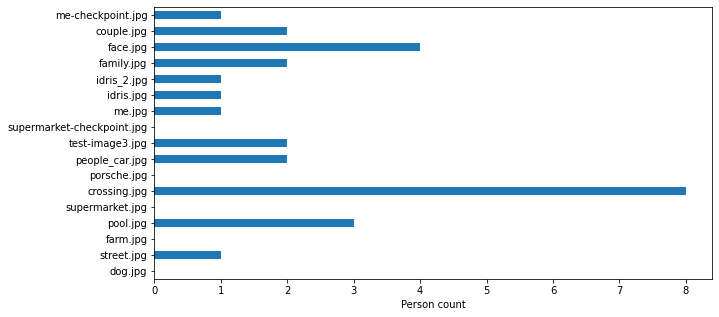

In [14]:
pd.Series(people).plot.barh(figsize=(10,5)).set_xlabel('Person count');